<a href="https://colab.research.google.com/github/gnanendri/Laptop-Price-Prediction-1/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv('/content/laptop_prices.csv')  # Replace with your actual filename

In [ ]:
# Handle missing values (if any)
df.fillna(0, inplace=True)

In [ ]:
# Convert binary columns
for col in ['Touchscreen', 'IPSpanel', 'RetinaDisplay']:
    df[col] = df[col].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

In [ ]:
# Drop columns that are too specific or not useful
df.drop(['Product', 'CPU_model', 'GPU_model'], axis=1, inplace=True)

In [ ]:
# One-Hot Encoding for categorical variables
categorical_cols = ['Company', 'TypeName', 'OS', 'PrimaryStorageType', 'SecondaryStorageType', 'CPU_company', 'GPU_company', 'Screen']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Convert RAM and storage to numeric if needed
df['Ram'] = df['Ram'].astype(int)
df['PrimaryStorage'] = df['PrimaryStorage'].astype(int)
df['SecondaryStorage'] = df['SecondaryStorage'].astype(int)
df['Weight'] = df['Weight'].astype(float)

In [ ]:
# Define features and target
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 116404.71720366042
R-squared: 0.7654734913785197


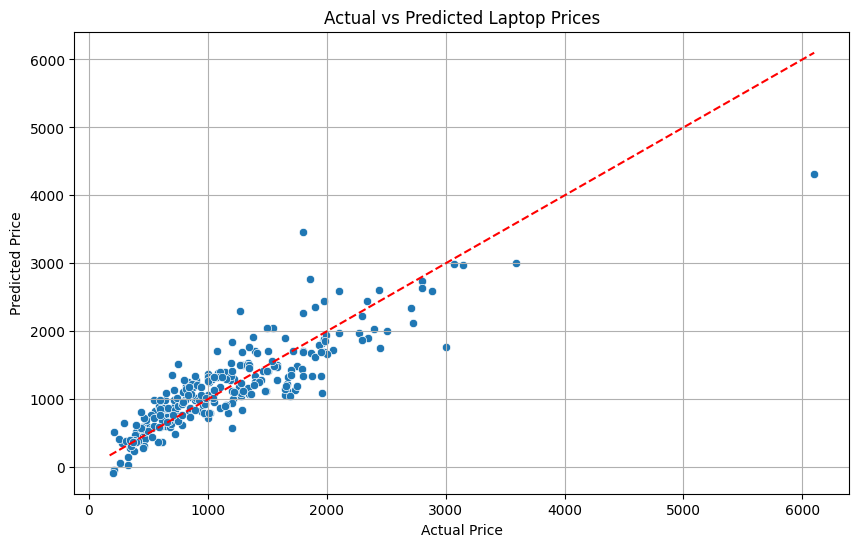

In [ ]:
# Visualize actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()

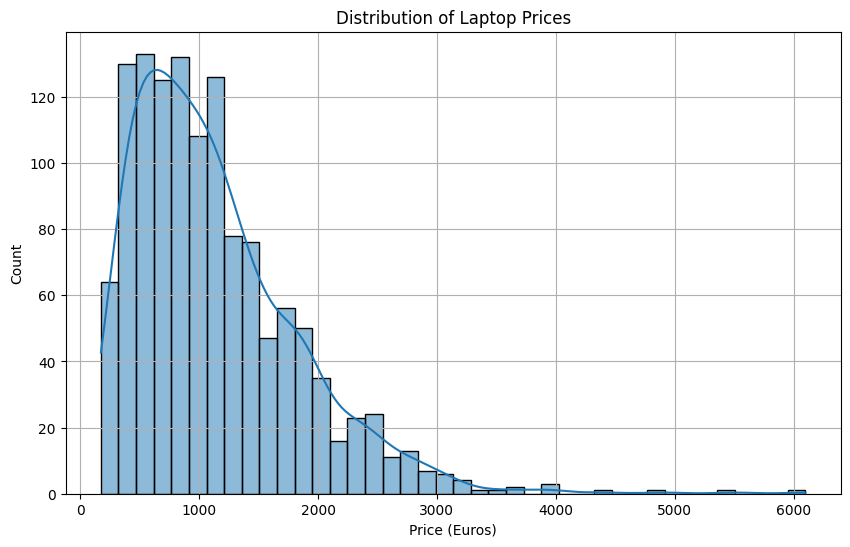

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], kde=True, bins=40)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


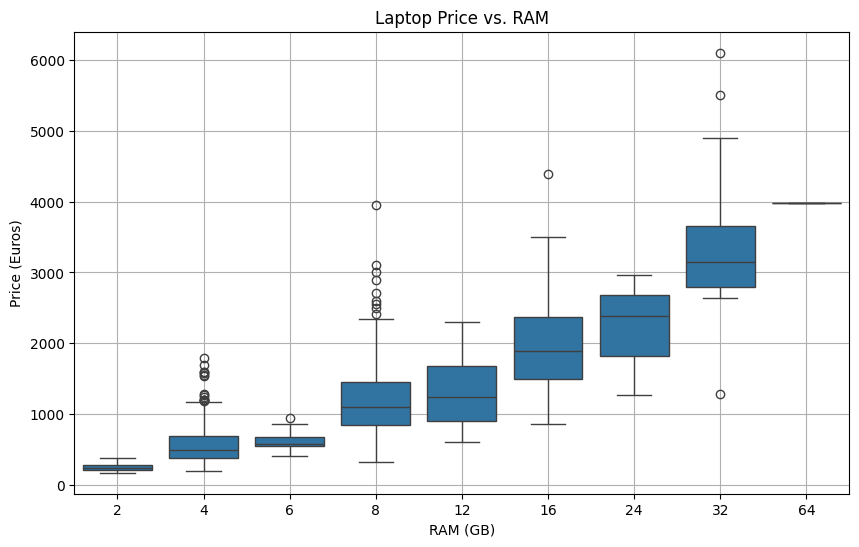

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Laptop Price vs. RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euros)')
plt.grid(True)
plt.show()


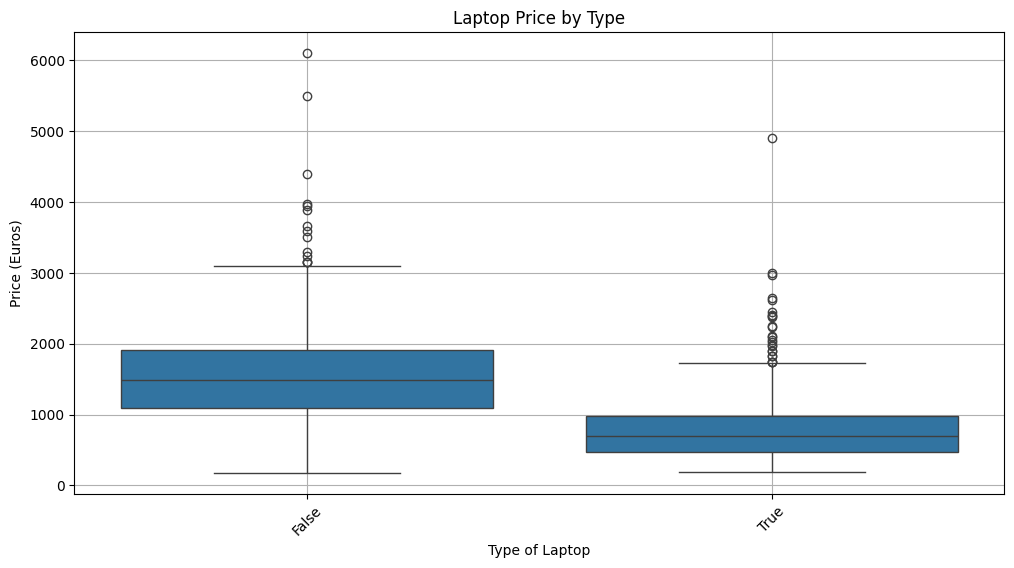

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='TypeName_Notebook', y='Price_euros', data=df)  # Use one of the one-hot encoded columns
plt.xticks(rotation=45)
plt.title('Laptop Price by Type')
plt.xlabel('Type of Laptop')
plt.ylabel('Price (Euros)')
plt.grid(True)
plt.show()


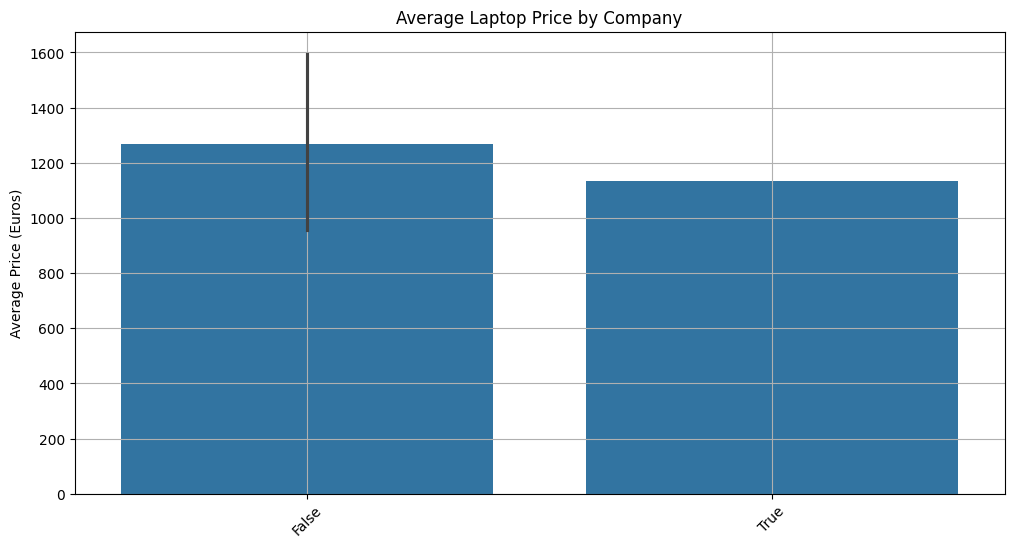

In [ ]:
plt.figure(figsize=(12, 6))
# Group by the one-hot encoded company columns instead of 'Company'
# Assuming your one-hot encoded columns start with 'Company_'
avg_price_by_company = df.groupby(
    [col for col in df.columns if col.startswith('Company_')]
)['Price_euros'].mean().sort_values(ascending=False)

# Extract company names from the index
# Convert the MultiIndex to a list of tuples
index_tuples = avg_price_by_company.index.tolist()

# Extract company names from the tuples
company_names = [tuple_[-1] for tuple_ in index_tuples]  # Extract the last element of each tuple

sns.barplot(x=company_names, y=avg_price_by_company.values)
plt.xticks(rotation=45)
plt.title('Average Laptop Price by Company')
plt.ylabel('Average Price (Euros)')
plt.grid(True)
plt.show()


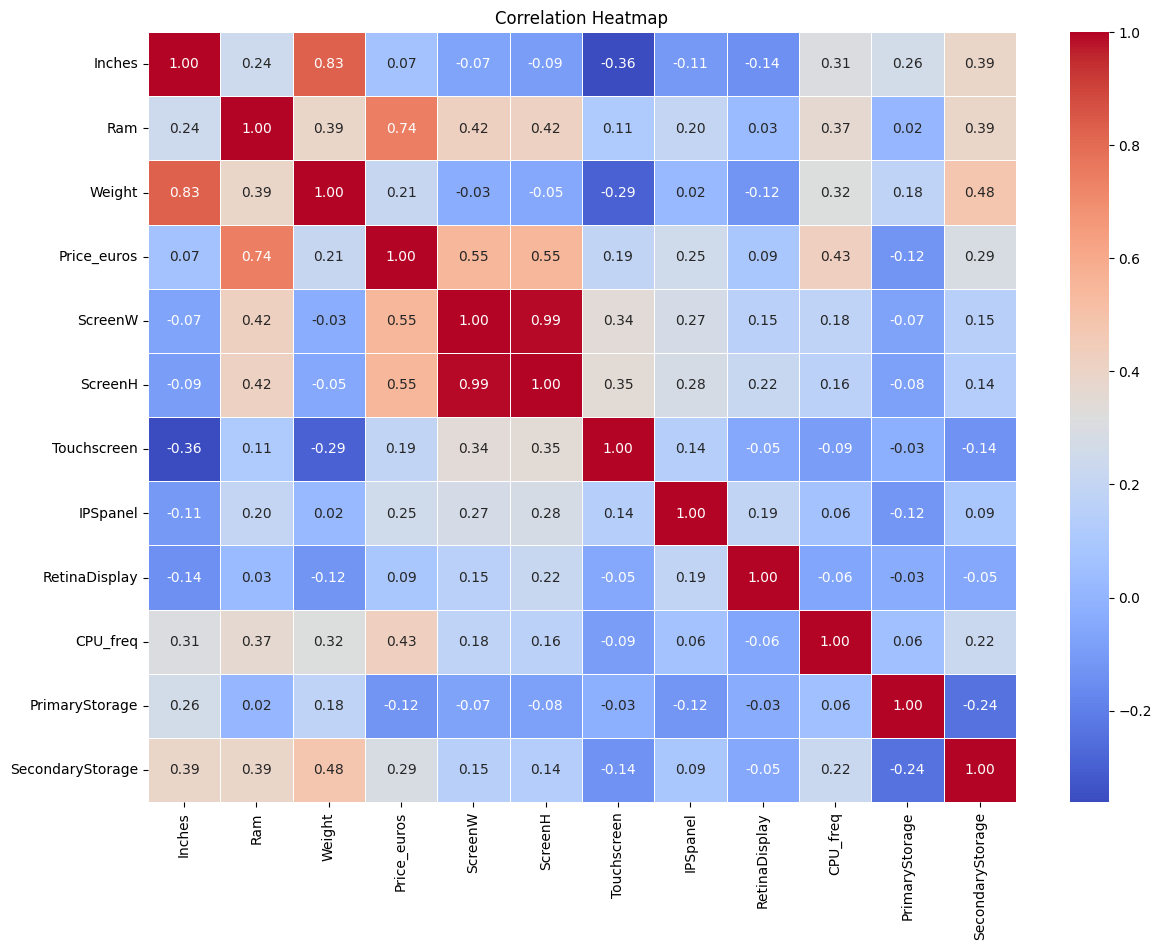

In [ ]:
plt.figure(figsize=(14, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


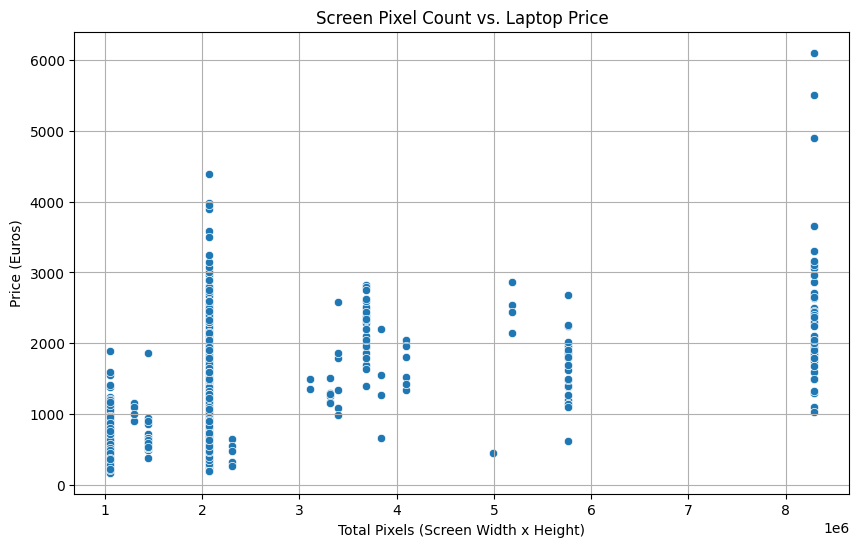

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ScreenW'] * df['ScreenH'], y=df['Price_euros'])
plt.title('Screen Pixel Count vs. Laptop Price')
plt.xlabel('Total Pixels (Screen Width x Height)')
plt.ylabel('Price (Euros)')
plt.grid(True)
plt.show()